Решить краевую задачу для ОДУ второго порядка конечно-разностным методом.  
x(x^2 + 6)y'' - 4(x^2 + 3)y' + 6xy = 0, y'(0) = 0, y(4) - y'(4) = 26  
y'' - 4(x^2 + 3)/(x(x^2 + 6))y' + 6y/(x^2 + 6) = 0  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = lambda x: - 4*(x*x + 3)/(x*(x*x + 6))
q = lambda x: 6/(x*x + 6) 

def TMA(A, d):
    n = len(A)
    if len(d) != n:
        raise ValueError("Invalid argument: incompatible sizes between A & d.", d.size, n)
    d = d.reshape(n, )
    a = [0]
    c = []
    b = []
    for i in range(n-1):
        a.append(A[i+1][i])
        b.append(A[i][i])
        c.append(A[i][i+1])
    b.append(A[n-1][n-1])
    c.append(0)
    P = [-c[0]/b[0]]
    
    Q = [d[0]/b[0]]
    for i in range(1, n-1):
        P.append(-c[i]/(b[i] + a[i]*P[i-1]))
        Q.append((d[i] - a[i]* Q[i-1])/(b[i] + a[i]*P[i-1]))
    P.append(0)
    Q.append((d[n-1] - a[n-1]*Q[n-2])/(b[n-1] + a[n-1]*P[n-2]))
    
    x = [0]*n
    x[n-1] = Q[n-1]
    for i in reversed(range(n-1)):
        x[i] = P[i]*x[i+1] + Q[i]
    #print("a = ", a, "b = ",  b, "c = ",  c, "P = ", P, "Q = ", Q, "X = ", x, sep = '\n')
    return x

#концы отрезка
a, b = 0, 4

#краевые условия
left_border, right_border = 0, 26



def finite_diff(a, b, left_border, right_border, order=1, h=0.01):
    
    xx = np.arange(a+h, b, h)
    N = len(xx)
    
    P = [p(x) for x in xx]  
    Q = [q(x) for x in xx] 
    
    A = np.zeros((N, N))
    D = np.zeros((N, 1))

    if order == 1:
        A[0][0] = -1 + h*h*Q[0] - h*P[0]/2
        A[0][1] = 1 + h*P[0]/2
        D[0][0] = left_border*h*(1 -h*P[0]/2)
        for i in range(1, N-1):
            A[i][i-1] = 1 - h*P[i]/2
            A[i][i] = -2 + h*h*Q[i]
            A[i][i+1] = 1 + h*P[i]/2
        A[N-1][N-2] = 1 - h*P[N-1]/2
        A[N-1][N-1] = -2-1/(h-1) - h*P[N-1]/2/(h-1) + h*h*Q[N-1]
        D[N-1][0] = -h*right_border/(h-1)*(1+h*P[N-1]/2)

    elif order == 2:
        A[0][0] = -2/3 + h*h*Q[0] - 2*h*P[0]/3
        A[0][1] = 2/3 + h*P[0]/3
        D[0][0] = left_border*h*(2/3 - h*P[0]/3)
        for i in range(1, N-1):
            A[i][i-1] = 1 - h*P[i]/2
            A[i][i] = -2 + h*h*Q[i]
            A[i][i+1] = 1 + h*P[i]/2
        A[N-1][N-2] = 1/(2*h-3) + 1 + h*P[N-1]/2*(1/(2*h - 3) - 1)
        A[N-1][N-1] = -4/(2*h-3) - 2 - 2*h*P[N-1]/(2*h-3) + h*h*Q[N-1]
        D[N-1][0] = -h*right_border/(2*h - 3)*(2 + h*P[N-1])
        
    return (xx, (TMA(np.copy(A), np.copy(D))))





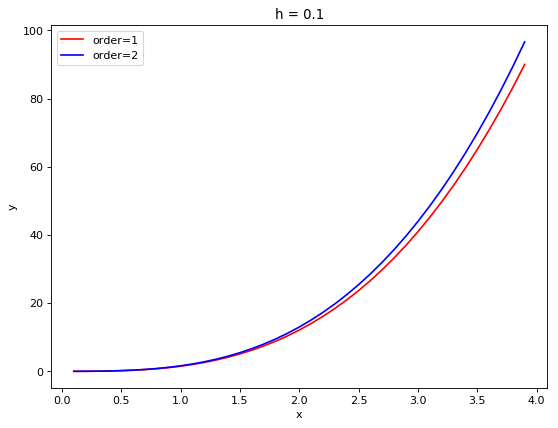

In [14]:
ans_ord1 = finite_diff(a, b, left_border, right_border, order=1, h=0.1)
ans_ord2 = finite_diff(a, b, left_border, right_border, order=2, h=0.1)
x_arr1, x_arr2 = ans_ord1[0], ans_ord2[0]
y_arr1, y_arr2 = ans_ord1[1], ans_ord2[1]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr1, y_arr1, 'r', x_arr2, y_arr2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title("h = 0.1")
plt.legend(("order=1", "order=2"))



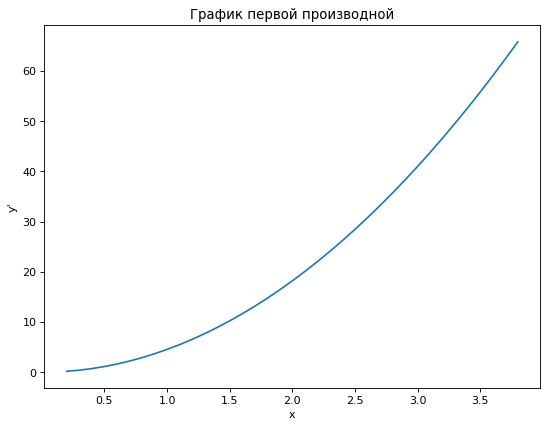

In [8]:
h = 0.1
y_first_der = [(y_arr1[i+1] - y_arr1[i-1])/(2*h) for i in range(1, len(y_arr1)-1)]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("График первой производной")
plt.xlabel('x')
plt.ylabel("y'")
plt.plot(x_arr1[1:-1], y_first_der)


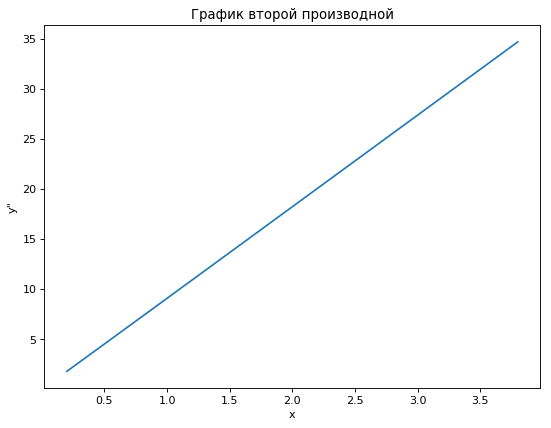

In [9]:
y_second_der = [(y_arr1[i+1] - 2*y_arr1[i] + y_arr1[i-1])/(h*h) for i in range(1, len(y_arr1)-1)]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("График второй производной")
plt.xlabel('x')
plt.ylabel('y"')
plt.plot(x_arr1[1:-1], y_second_der)

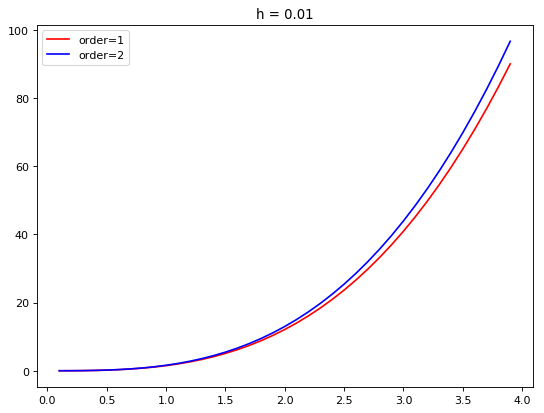

In [15]:
ans_ord1 = finite_diff(a, b, left_border, right_border, order=1, h=0.01)
ans_ord2 = finite_diff(a, b, left_border, right_border, order=2, h=0.01)
xx1, xx2 = ans_ord1[0], ans_ord2[0]
yy1, yy2 = ans_ord1[1], ans_ord2[1]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr1, y_arr1, 'r', x_arr2, y_arr2, 'b')
plt.title("h = 0.01")
plt.legend(("order=1", "order=2"))

